In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train_copy = pd.read_csv('./datasets/train.csv') 

In [3]:
# '산업군' 칼럼 데이터 정리 
# 사업1, 사업2, ... 을 '사업'으로 통합
# '기타', '무역', '산업', '운송'으로 통합 

train_copy.loc[train_copy['산업군'].str[:2] == '사업', '산업군'] = '사업'
train_copy.loc[train_copy['산업군'].str[:2] == '기타', '산업군'] = '기타'
train_copy.loc[train_copy['산업군'].str[:2] == '무역', '산업군'] = '무역'
train_copy.loc[train_copy['산업군'].str[:2] == '산업', '산업군'] = '산업'
train_copy.loc[train_copy['산업군'].str[:2] == '운송', '산업군'] = '운송'

### 사용하지 않는 column, row 삭제

In [4]:
# feature로 사용하지 않을 column 'ID' 삭제
train_copy.drop('ID', axis = 1, inplace=True)

In [5]:
# '성별'이 '기타'인 데이터 삭제(1 row)
train_copy.drop(train_copy.loc[train_copy['성별'] == '기타'].index, inplace=True)

In [6]:
# 0 : 남성
# 1 : 여성
train_copy['성별'].value_counts()

성별
여성    39734
남성    20265
Name: count, dtype: int64

In [7]:
# '자녀 수'가 10명인 데이터 삭제(3 row)
train_copy = train_copy[~(train_copy['자녀 수'] > 10)]

In [8]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59996 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TARGET          59996 non-null  int64  
 1   성별              59996 non-null  object 
 2   차량 소유 여부        59996 non-null  int64  
 3   부동산 소유 여부       59996 non-null  int64  
 4   자녀 수            59996 non-null  int64  
 5   연간 수입           59996 non-null  float64
 6   수입 유형           59996 non-null  object 
 7   최종 학력           59996 non-null  object 
 8   결혼 여부           59996 non-null  object 
 9   주거 형태           59996 non-null  object 
 10  거주지 인구 비율       59996 non-null  float64
 11  휴대전화 소유 여부      59996 non-null  int64  
 12  업무용 휴대전화 소유 여부  59996 non-null  int64  
 13  이메일 소유 여부       59996 non-null  int64  
 14  직업              59996 non-null  object 
 15  가족 구성원 수        59996 non-null  float64
 16  산업군             59996 non-null  object 
 17  나이              59996 non-null  int6

### 파생변수 생성

In [9]:
# '거주지 인구 비율' * 대한민국 인구수(2024.1.4 기준 통계청자료 : 51,751,065) 
train_copy['인구수'] = (train_copy['거주지 인구 비율'] * 51751065).round(0).astype(int)

In [10]:
# 거대도시는 인구 100만명 이상, 대도시는 인구 50만명 이상, 중소도시는 10만명 이상에서 50만명 이하, 소도시는 10만명 이하로 구분
# 위의 기준으로 분류하여 '도시구분' column 생성
# 0 : '소도시'
# 1 : '중소도시'
# 2 : '대도시' 
# 3 : '거대도시'

train_copy['도시구분'] = pd.cut(train_copy['인구수'], bins=[0, 100000, 500000, 1000000, float('inf')], 
                      labels=['0', '1', '2', '3'])

In [11]:
train_copy['도시구분'].value_counts()

도시구분
3    27759
2    17698
1    14292
0      247
Name: count, dtype: int64

In [13]:
train_copy['도시구분'].info()

<class 'pandas.core.series.Series'>
Index: 59996 entries, 0 to 59999
Series name: 도시구분
Non-Null Count  Dtype   
--------------  -----   
59996 non-null  category
dtypes: category(1)
memory usage: 527.5 KB


In [16]:
# 데이터타입 변경 category -> int
train_copy['도시구분'] = train_copy['도시구분'].astype(int)

In [17]:
train_copy['도시구분'].info()

<class 'pandas.core.series.Series'>
Index: 59996 entries, 0 to 59999
Series name: 도시구분
Non-Null Count  Dtype
--------------  -----
59996 non-null  int32
dtypes: int32(1)
memory usage: 703.1 KB


In [18]:
# '연간 수입'을 5개의 구간으로 분류하여 '소득수준' column 생성
# 0 : 0원 이상 5천만원 미만
# 1 : 5천만원 이상 1억원 미만
# 2 : 1억원 이상 1.5억원 미만
# 3 : 1.5억원 이상 2억원 미만
# 4 : 2억원 이상

train_copy['소득수준'] = pd.cut(train_copy['연간 수입'], bins=[0, 50000000, 100000000, 150000000, 200000000, float('inf')],  
                    labels=['0', '1', '2', '3','4'])

In [22]:
train_copy['소득수준'].value_counts()

소득수준
0    46314
1    12448
2      925
3      228
4       81
Name: count, dtype: int64

In [19]:
train_copy['소득수준'].info()

<class 'pandas.core.series.Series'>
Index: 59996 entries, 0 to 59999
Series name: 소득수준
Non-Null Count  Dtype   
--------------  -----   
59996 non-null  category
dtypes: category(1)
memory usage: 527.5 KB


In [20]:
# 데이터타입 변경 category -> int
train_copy['소득수준'] = train_copy['소득수준'].astype(int)

In [21]:
train_copy['소득수준'].info()

<class 'pandas.core.series.Series'>
Index: 59996 entries, 0 to 59999
Series name: 소득수준
Non-Null Count  Dtype
--------------  -----
59996 non-null  int32
dtypes: int32(1)
memory usage: 703.1 KB


In [23]:
train_copy.head()

,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,...,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수,도시구분,소득수준
0,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,주택 / 아파트,...,0,Unknown,4.0,기타,39,1000,23.0,256685,1,0
1,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,...,0,기술직,2.0,사업,45,4,16.0,933020,2,1
2,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,주택 / 아파트,...,0,단순 노동자,2.0,사업,32,3,9.0,543386,2,0
3,0,여성,1,0,1,38232000.0,기타,고등학교 졸업,기혼,주택 / 아파트,...,0,Unknown,3.0,산업,34,6,12.0,250941,1,0
4,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,주택 / 아파트,...,0,Unknown,2.0,사업,38,0,4.0,1302264,3,0


### Label Encoding
* 범주형 데이터를 수치형 데이터로 변환

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encoding 
label_encoder = LabelEncoder()
train_copy['성별'] = label_encoder.fit_transform(train_copy['성별'])
train_copy['수입 유형'] = label_encoder.fit_transform(train_copy['수입 유형'])
train_copy['최종 학력'] = label_encoder.fit_transform(train_copy['최종 학력'])
train_copy['결혼 여부'] = label_encoder.fit_transform(train_copy['결혼 여부'])
train_copy['주거 형태'] = label_encoder.fit_transform(train_copy['주거 형태'])
train_copy['직업'] = label_encoder.fit_transform(train_copy['직업'])
train_copy['산업군'] = label_encoder.fit_transform(train_copy['산업군'])

In [25]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59996 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TARGET          59996 non-null  int64  
 1   성별              59996 non-null  int32  
 2   차량 소유 여부        59996 non-null  int64  
 3   부동산 소유 여부       59996 non-null  int64  
 4   자녀 수            59996 non-null  int64  
 5   연간 수입           59996 non-null  float64
 6   수입 유형           59996 non-null  int32  
 7   최종 학력           59996 non-null  int32  
 8   결혼 여부           59996 non-null  int32  
 9   주거 형태           59996 non-null  int32  
 10  거주지 인구 비율       59996 non-null  float64
 11  휴대전화 소유 여부      59996 non-null  int64  
 12  업무용 휴대전화 소유 여부  59996 non-null  int64  
 13  이메일 소유 여부       59996 non-null  int64  
 14  직업              59996 non-null  int32  
 15  가족 구성원 수        59996 non-null  float64
 16  산업군             59996 non-null  int32  
 17  나이              59996 non-null  int6

In [26]:
train_copy['인구수'].info()

<class 'pandas.core.series.Series'>
Index: 59996 entries, 0 to 59999
Series name: 인구수
Non-Null Count  Dtype
--------------  -----
59996 non-null  int32
dtypes: int32(1)
memory usage: 703.1 KB


In [115]:
train_copy.to_csv('./datasets/dataset.csv', index=False)

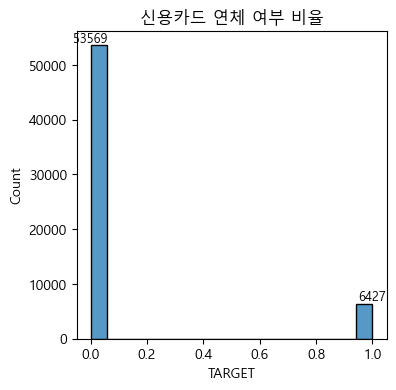

In [50]:
# 시각화 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정하기
plt.rc('font', family='Malgun Gothic')

# train 데이터프레임에서 'TARGET' 칼럼을 이용하여 y 값을 계산
y_values = train_copy['TARGET'].value_counts()

plt.subplots(figsize = (4,4)) # 그림 크기 설정

# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(train_copy, x='TARGET')
plt.title('신용카드 연체 여부 비율')

# 높이를 y값으로 지정
for i, value in enumerate(y_values):
    plt.text(i, value+1, str(value), ha='center', va='bottom', fontsize=9)
    
# 그래프 표시
plt.show()

## 오버샘플링 1 : RandomOverSampler
시각화로 TARGET 값을 확인했을 때, 신용카드 연체 인원(클래스 1)이 신용카드를 연체하지 않은 인원(클래스 0)보다 현격히 적은 것을 확인했습니다.
클래스 불균형 문제를 해결하기 위해, 클래스가 1인 데이터의 수를 오버샘플링 기법 중 하나인 Random Over Sampling을 통해 증강시키겠습니다! 

In [29]:
train_x = train_copy.drop('TARGET',axis = 1)
train_y = train_copy['TARGET']

In [53]:
len(train_y)

59996

In [55]:
train_x.head()

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,...,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수,도시구분,소득수준
0,1,1,1,2,18054000.0,5,0,0,3,0.004960,...,0,1,4.0,5,39,1000,23.0,256685,1,0
1,0,1,0,0,59472000.0,1,1,0,3,0.018029,...,0,4,2.0,16,45,4,16.0,933020,2,1
2,1,0,1,0,29736000.0,1,0,0,3,0.010500,...,0,5,2.0,16,32,3,9.0,543386,2,0
3,1,1,0,1,38232000.0,2,0,0,3,0.004849,...,0,1,3.0,17,34,6,12.0,250941,1,0
4,1,0,1,0,26550000.0,1,0,0,3,0.025164,...,0,1,2.0,16,38,0,4.0,1302264,3,0


In [57]:
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_number = 42
seed_everything(seed_number)
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed_number)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train_x, train_y)

## 오버샘플링 2 : 결과 확인
Random Over Sampling 결과를 다시 hisplot을 통해 시각화하면, class 0과 1의 수가 같아졌음을 확인하실 수 있습니다.

In [58]:
train_y_oversampled.value_counts()

TARGET
0    53569
1    53569
Name: count, dtype: int64

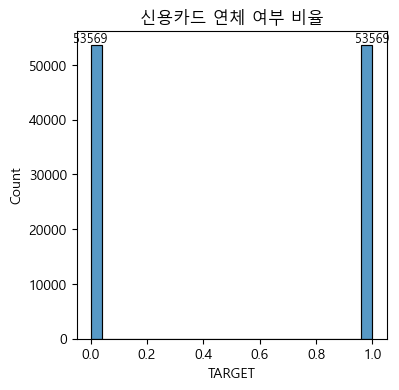

In [59]:
# train_y_oversampled 데이터프레임에서 y 값을 계산
y_values = train_y_oversampled.value_counts()

plt.subplots(figsize = (4,4))

# 높이를 y값으로 지정
for i, value in enumerate(y_values):
    plt.text(i, value+1, str(value), ha='center', va='bottom', fontsize=9)


# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(train_y_oversampled)
plt.title('신용카드 연체 여부 비율')

plt.show()

In [31]:
corr=train_x.corr()
corr

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,...,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수,인구수,도시구분,소득수준
성별,1.000000,-0.340126,0.037228,-0.053064,-0.169243,0.137755,-0.006782,0.112782,-0.002610,-0.017506,...,-0.014535,0.038591,-0.089275,0.007350,0.145483,0.160656,0.083171,-0.017506,-0.003594,-0.151996
차량 소유 여부,-0.340126,1.000000,-0.004992,0.104437,0.189847,-0.135747,0.064708,-0.123047,0.036668,0.039474,...,0.030869,0.047951,0.153774,0.054342,-0.137392,-0.153989,-0.099069,0.039474,0.040107,0.173793
부동산 소유 여부,0.037228,-0.004992,1.000000,0.002647,0.000133,0.058173,-0.022112,0.007176,0.171494,0.013568,...,0.029606,-0.022414,0.004750,-0.023334,0.084976,0.056249,0.014229,0.013568,0.033950,0.001346
자녀 수,-0.053064,0.104437,0.002647,1.000000,0.023554,-0.245369,0.020034,-0.108878,0.001980,-0.031236,...,0.024535,0.133178,0.879454,0.146778,-0.352838,-0.247244,-0.188721,-0.031236,-0.027960,0.019254
연간 수입,-0.169243,0.189847,0.000133,0.023554,1.000000,-0.103951,0.146565,-0.024863,0.001766,0.164038,...,0.086945,0.015535,0.031960,0.035337,-0.063670,-0.148582,-0.063624,0.164038,0.050991,0.805284
수입 유형,0.137755,-0.135747,0.058173,-0.245369,-0.103951,1.000000,-0.060754,0.072869,0.019817,0.037464,...,-0.049653,-0.470490,-0.242954,-0.559739,0.582568,0.943201,0.207567,0.037464,0.028242,-0.070409
최종 학력,-0.006782,0.064708,-0.022112,0.020034,0.146565,-0.060754,1.000000,-0.021902,0.011162,0.049791,...,0.065164,0.063372,0.005742,0.021593,-0.140838,-0.075241,-0.077326,0.049791,0.009726,0.141602
결혼 여부,0.112782,-0.123047,0.007176,-0.108878,-0.024863,0.072869,-0.021902,1.000000,-0.021900,0.003977,...,-0.013690,-0.035244,-0.269362,-0.034200,0.061081,0.071570,0.053772,0.003977,0.000251,-0.031194
주거 형태,-0.002610,0.036668,0.171494,0.001980,0.001766,0.019817,0.011162,-0.021900,1.000000,-0.023861,...,0.000679,-0.014509,0.019784,-0.004224,0.023894,0.019604,-0.037304,-0.023861,0.021418,-0.000648
거주지 인구 비율,-0.017506,0.039474,0.013568,-0.031236,0.164038,0.037464,0.049791,0.003977,-0.023861,1.000000,...,0.037075,-0.010977,-0.029549,-0.017676,0.028464,-0.004257,0.052970,1.000000,0.759607,0.167318


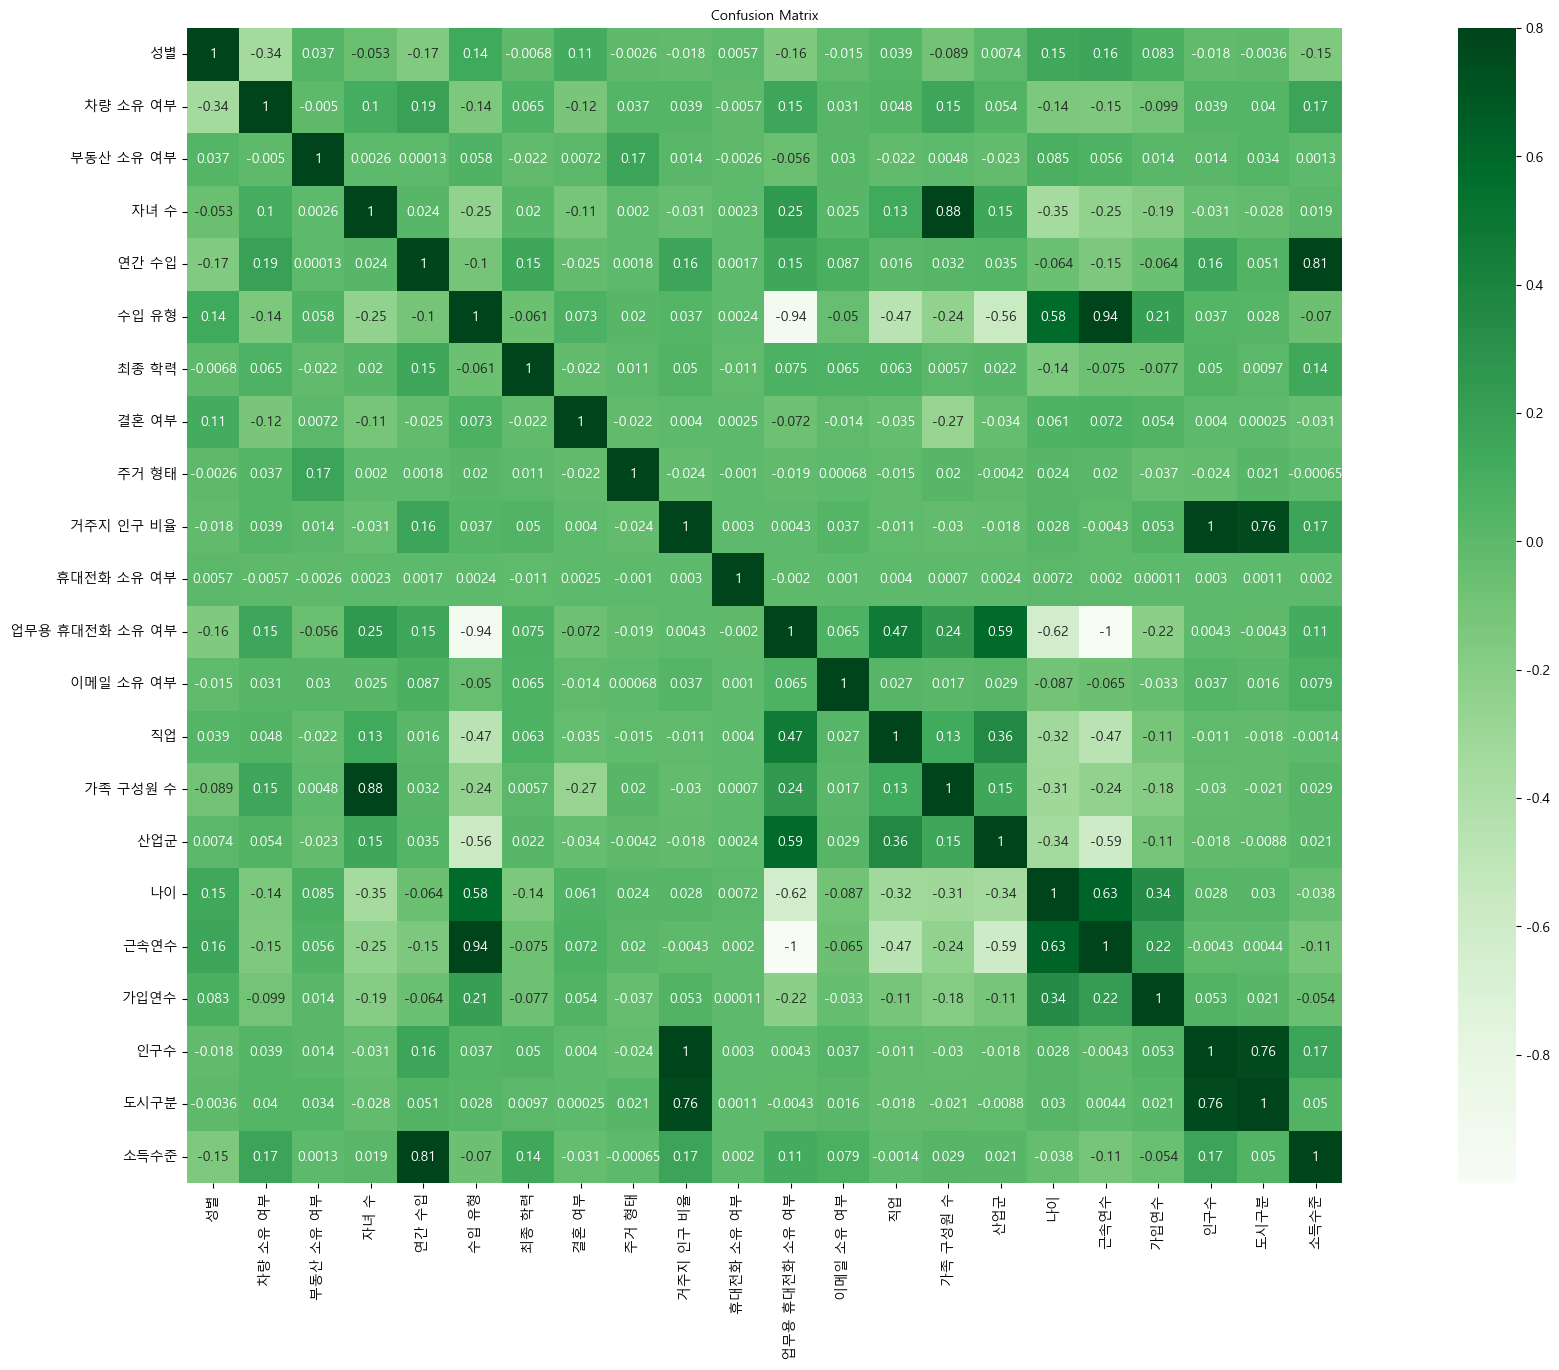

In [43]:
fig, ax = plt.subplots() 
fig.set_size_inches(30,15)
sns.heatmap(corr, vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=10);

In [44]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr>' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
#'<table><tr style="background-color:#ddefdd;">' 

In [45]:
nunique_df={var:pd.DataFrame(train_x[var].value_counts())
           for var in {'차량 소유 여부', '부동산 소유 여부', '자녀 수',
       '연간 수입', '거주지 인구 비율',
       '휴대전화 소유 여부', '업무용 휴대전화 소유 여부',
       '가족 구성원 수', '나이', '근속연수', '가입연수', '성별', '수입 유형',
       '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'}}

multi_table([nunique_df['차량 소유 여부'],nunique_df['부동산 소유 여부'],nunique_df['자녀 수'],
             nunique_df['연간 수입'],nunique_df['거주지 인구 비율'],
             nunique_df['휴대전화 소유 여부'],nunique_df['업무용 휴대전화 소유 여부'],nunique_df['가족 구성원 수'],nunique_df['나이'],nunique_df['근속연수'],
             nunique_df['가입연수'],nunique_df['성별'],nunique_df['수입 유형'],nunique_df['최종 학력'],nunique_df['결혼 여부'],nunique_df['주거 형태'],nunique_df['직업'],nunique_df['산업군']])

,count
차량 소유 여부,
0,39748
1,20248
,count
부동산 소유 여부,
1,42515
0,17481
,count
자녀 수,
0,42316


아래처럼 보고 싶은 칼럼만 넣어서 볼 수 있어요

In [46]:
multi_table([nunique_df['산업군'], nunique_df['근속연수'],nunique_df['가입연수'],nunique_df['나이']])

,count
산업군,
16,16343
5,14466
24,7548
17,2715
10,2666
23,2180
26,2021
20,1755
30,1731


In [47]:
multi_table([nunique_df['수입 유형'],nunique_df['최종 학력'], nunique_df['성별'],nunique_df['결혼 여부'],nunique_df['주거 형태']])

,count
수입 유형,
1,30690
2,13878
5,11274
0,4146
4,4
6,2
3,2
,count
최종 학력,


In [48]:
# people with an age between x and y
def age_group(df,col,arr):
    #MAX AND MIN AGE
    max_ = df[col].max()
    min_ = df[col].min()
    print(f"maximum Age {max_}")
    print(f"minimum Age {min_}")
   
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df[col].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group(train_x, '나이',[0 ,18, 29, 39, 49, 59, 69])

maximum Age 69
minimum Age 21
Age between 1 and 18: Number of people 0
Age between 19 and 29: Number of people 7885
Age between 30 and 39: Number of people 15748
Age between 40 and 49: Number of people 15148
Age between 50 and 59: Number of people 13880
Age between 60 and 69: Number of people 7335


In [49]:
#people with an income between x and y
def income_group(df,col,arr):
    #max and min income
    max_ = df[col].max()
    min_ = df[col].min()

    print(f"maximum Income {max_}")
    print(f"minimum Income {min_}")
        
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df[col].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group(train_x, '연간 수입',[0, 26550000, 35046000, 47790000, 88000000,float('inf')])

maximum Income 2124000000.0
minimum Income 6265800.0
Income between 1 and 26550000: Number of people 19450
Income between 26550001 and 35046000: Number of people 10642
Income between 35046001 and 47790000: Number of people 15889
Income between 47790001 and 88000000: Number of people 12152
Income between 88000001 and inf: Number of people 1863


In [ ]:
# 시각화 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정하기
plt.rc('font', family='Malgun Gothic')

# train 데이터프레임에서 'TARGET' 칼럼을 이용하여 y 값을 계산
y_values = train['TARGET'].value_counts()

plt.subplots(figsize = (4,4)) # 그림 크기 설정

# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(train, x='TARGET')
plt.title('신용카드 연체 여부 비율')

# 높이를 y값으로 지정
for i, value in enumerate(y_values):
    plt.text(i, value+1, str(value), ha='center', va='bottom', fontsize=9)
    
# 그래프 표시
plt.show()